# Tutorial 16 - Solving ODEs using Neural Networks
Based on various resources from internet.

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

In [214]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
#Define a list of (weights, biases tuples, one for each layer."
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [215]:
# Define a sigmoid activation function. Can also be used from library. This is a simple definition.
def sigmoid_activation(x):
    "see https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

In [216]:
# Define function y based on neural networks. Outputs are linearly related to biases and weights.
# Outputs of one layer are used as inputs to another layer via activation function.
def y(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
#        inputs = sigmoid_activation(outputs)    
        inputs = np.tanh(outputs)
    return outputs

In [217]:
# Make an initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 64, 1])

In [ ]:
dydx = elementwise_grad(y, 1) # this is the first partial derivative of y w/t x.
# The argument options of any function can be revealed by pressing "shift + tab" by bringing the keyboard
# cursor to the function.

In [219]:
k = 1.0
y0 = 0.0
x = np.linspace(0, 10).reshape((-1, 1))

In [220]:
# Define the objective function.
def lossfunction(params, step):
    # The objective is to minimize to zero.
    # dydx = -k * y(x)
#    domain_loss = dydx(params, x) - (-k*y(params,x)) # loss in domain
#    domain_loss=dydx(params,x) - x #(2*np.power(x,2))#(np.exp(-x))
    domain_loss=dydx(params,x) - 2*np.power(x,3) + (np.exp(-x))
    boundary_loss = y(params, 0) - y0 # loss at boundary
    return np.mean(domain_loss**2) + boundary_loss**2 # total loss

In [221]:
def callback(params, step, g):
    if step % 500 == 0:
        print("Iteration {0:3d} lossfunction {1}".format(step,
                                                      lossfunction(params, step)))

In [222]:
params = adam(grad(lossfunction), params,
              step_size=0.01, num_iters=50001, callback=callback)

Iteration   0 lossfunction [[600824.86551131]]
Iteration 500 lossfunction [[549000.77173482]]
Iteration 1000 lossfunction [[523732.22828963]]
Iteration 1500 lossfunction [[506252.07468308]]
Iteration 2000 lossfunction [[476423.97665793]]
Iteration 2500 lossfunction [[436458.18509688]]
Iteration 3000 lossfunction [[401513.11024851]]
Iteration 3500 lossfunction [[368948.73510589]]
Iteration 4000 lossfunction [[338118.47745556]]
Iteration 4500 lossfunction [[311986.63342737]]
Iteration 5000 lossfunction [[287982.25760745]]
Iteration 5500 lossfunction [[262816.67739368]]
Iteration 6000 lossfunction [[240072.53957694]]
Iteration 6500 lossfunction [[219530.23051964]]
Iteration 7000 lossfunction [[200548.31413314]]
Iteration 7500 lossfunction [[182651.52767475]]
Iteration 8000 lossfunction [[165816.10405952]]
Iteration 8500 lossfunction [[150095.26766565]]
Iteration 9000 lossfunction [[135344.47551124]]
Iteration 9500 lossfunction [[121441.97256924]]
Iteration 10000 lossfunction [[108405.7537

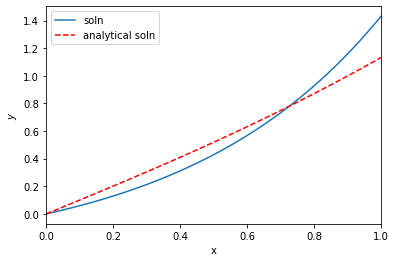

In [226]:
tfit = np.linspace(0,1).reshape(-1, 1)
import matplotlib.pyplot as plt
plt.plot(tfit, y(params, tfit), label='soln')
#plt.plot(tfit, np.power(tfit,2)/2, 'r--', label='analytical soln')
plt.plot(tfit, 1+np.power(tfit,2)/2-np.exp(-tfit), 'r--', label='analytical soln')
plt.legend()
plt.xlabel('x')
plt.ylabel('$y$')
plt.xlim([0, 1])
plt.savefig('odenn.png')